# Explore here

### 1. Problem Statement and Data Collection

#### 1.1 The problem
We'll be analysing a dataset containing Airbnb's listings for the city of New York during 2019 in order to understand if we can get any useful information from it.


In [4]:
# 1.2 Data Collection

import pandas as pd

# import dataset
abnb_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

abnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 2. Exploration and data cleaning

We'll try to understand the data and its main features.

In [5]:
# Obtain the dimensions of the dataset
abnb_data.shape

(48895, 16)

In [6]:
# Obtain information about data types and non-null values
abnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From here we can deduct that we're dealing with a dataset of 48895 rows and 16 columns. Most of the columns seem to be free of null values save for 4 of them.

Let's do a quick search of duplicates.

In [7]:
abnb_data.duplicated().sum()

0

The columns associated to the Ids of the hosts and listings don't add any significant value, since they're just identifiers, so we can drop them.

In [8]:
abnb_data.drop(['id', 'host_id'], axis=1, inplace=True)
abnb_data.info()
abnb_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_count  

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Now that our dataset seems to be neat and clean. Let's move on to the next part:

### 3. Analysis of univariate variables
#### 3.1 Analysis on categorical variables
Let's plot the categorical variables in our dataset and see what they can show us.

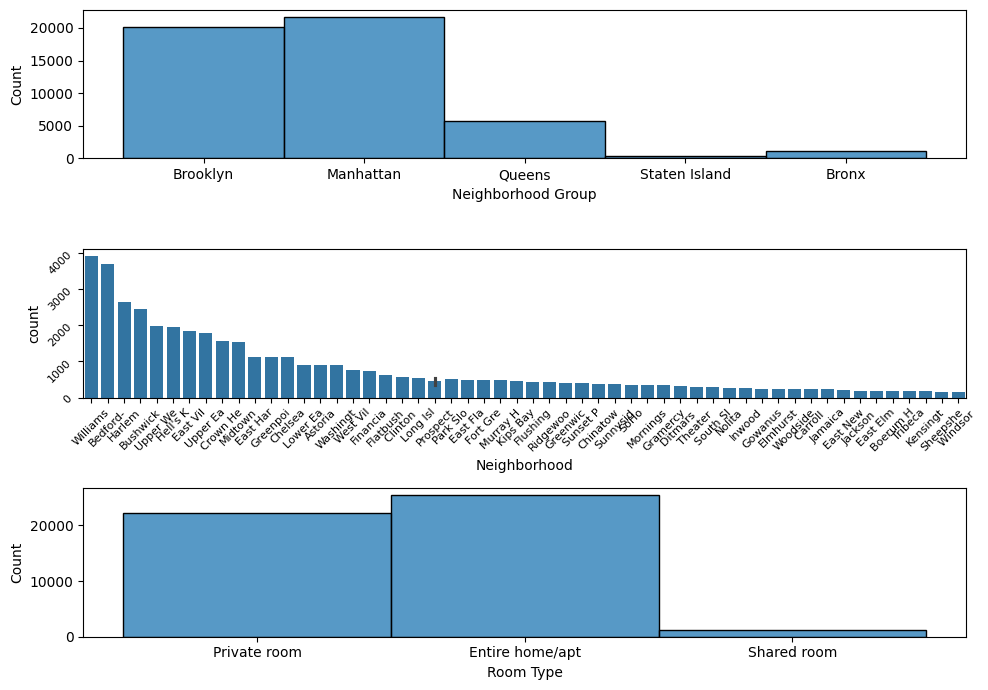

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

# group by neighborhoods
abnb_data_neighborhoods = abnb_data.groupby(['neighbourhood'])['name'].count().reset_index(name='count').sort_values(['count'], ascending=False)
# reindex
abnb_data_neighborhoods = abnb_data_neighborhoods.reset_index(drop=True)
# get top quarter
abnb_data_neighborhoods = abnb_data_neighborhoods[0:len(abnb_data_neighborhoods)//4]
# truncate labels
abnb_data_neighborhoods['neighbourhood'] = abnb_data_neighborhoods['neighbourhood'].apply(lambda x: x[:8])

fig, axs = plt.subplots(3, figsize = (10, 7))

# Create a multiple histogram
sns.histplot(ax = axs[0], data = abnb_data, x = "neighbourhood_group").set(xlabel = 'Neighborhood Group')
sns.barplot(ax = axs[1],data=abnb_data_neighborhoods, x = "neighbourhood", y = abnb_data_neighborhoods['count']).set(xlabel = 'Neighborhood')
axs[1].tick_params(labelrotation=45, labelsize=8)
sns.histplot(ax = axs[2], data = abnb_data, x = "room_type").set(xlabel = 'Room Type')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

It seems from these graphs that most of the listings are located in Brooklyn and Manhattan, with Williamsburg, Bedford-Stuyvesant and Harlem being the most popular neighborhoods. 

Also, it seems shared rooms are the less popular of the three types listed in this dataset. If I had to guess, I'd say these must be the cheapest.

#### 3.2 Analysis on numerical variables
Now let's plot the numerical variables. For this part lets focus on the columns that have a numeric data type in the dataframe. Since they have a significant amount of nulls, we'll omit the columns last_review, reviews_per_month.

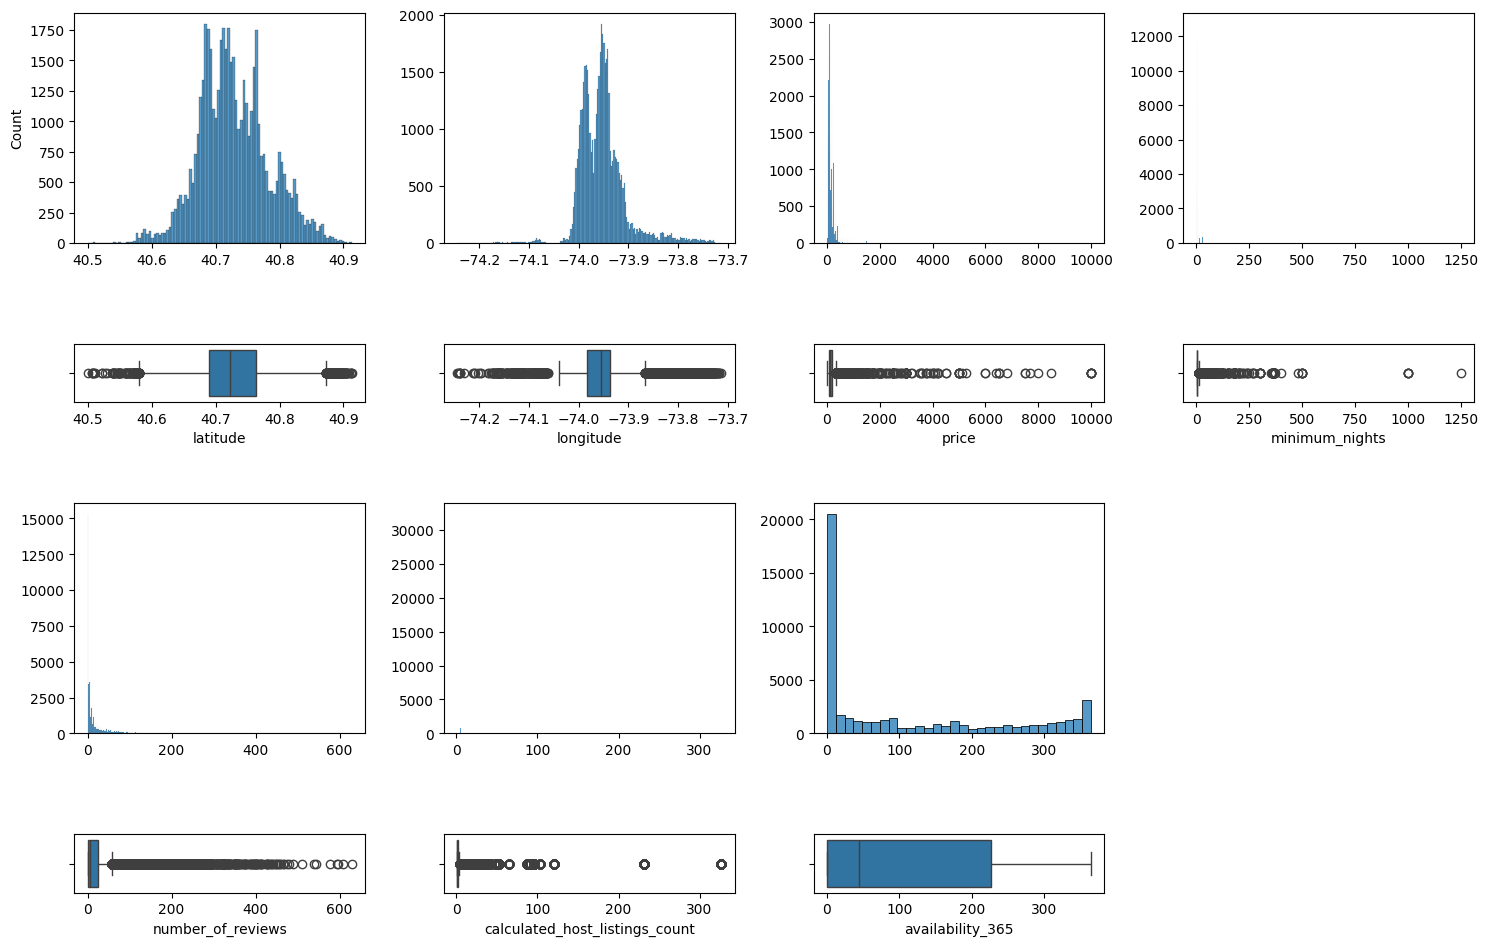

In [10]:
#abnb_data.info()

fig, axs = plt.subplots(4, 4, figsize = (15, 10))
fig.delaxes(axs[2, 3])
fig.delaxes(axs[3, 3])

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axs[0, 0], data = abnb_data, x = "latitude").set(xlabel = None)
sns.boxplot(ax = axs[1, 0], data = abnb_data, x = "latitude").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 1], data = abnb_data, x = "longitude").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 1], data = abnb_data, x = "longitude").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 2], data = abnb_data, x = "price").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 2], data = abnb_data, x = "price").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 3], data = abnb_data, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 3], data = abnb_data, x = "minimum_nights").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 0], data = abnb_data, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 0], data = abnb_data, x = "number_of_reviews").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 1], data = abnb_data, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 1], data = abnb_data, x = "calculated_host_listings_count").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 2], data = abnb_data, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 2], data = abnb_data, x = "availability_365").set_box_aspect(0.2)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

We can see for the numerical variables that latitude and longitude have a distribution that is somewhat normal, meaning that, at least for the coordinates, the airbnb listings accumulate on certain areas, most likely towards the neighbourhoods seen in the categorical analysis.

For the availability there seems to be a clear inclination towards zero, meaning that New York listings are highly solicited and a lot of them were occupied all year long in 2019.

The rest of the variables seem to have too many outliers to have a significant insight from them.

### 4. Analysis of multivariate variables
Now let's see how the variables relate to each other. 

#### 4.1 Numerical-Numerical
Let's start with the numerical variables.

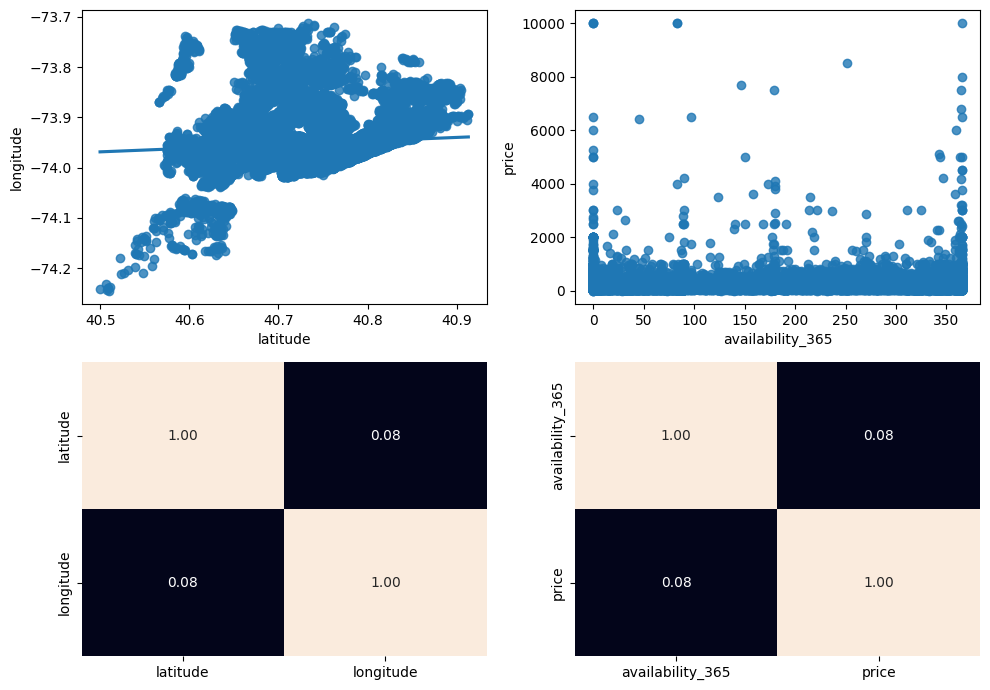

In [11]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = abnb_data, x = "latitude", y = "longitude")
sns.heatmap(abnb_data[["latitude", "longitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = abnb_data, x = "availability_365", y = "price")
sns.heatmap(abnb_data[["availability_365", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

While the heatmap seems to indicate the variables are not related, the coordinates scatter plot seems to indicate where in NYC the listings cluster, an interesting ecercise would be to overlap our graph with a satellite map of the city.

There doesn't seem to be any relationship between the price of a listing and its availability. 

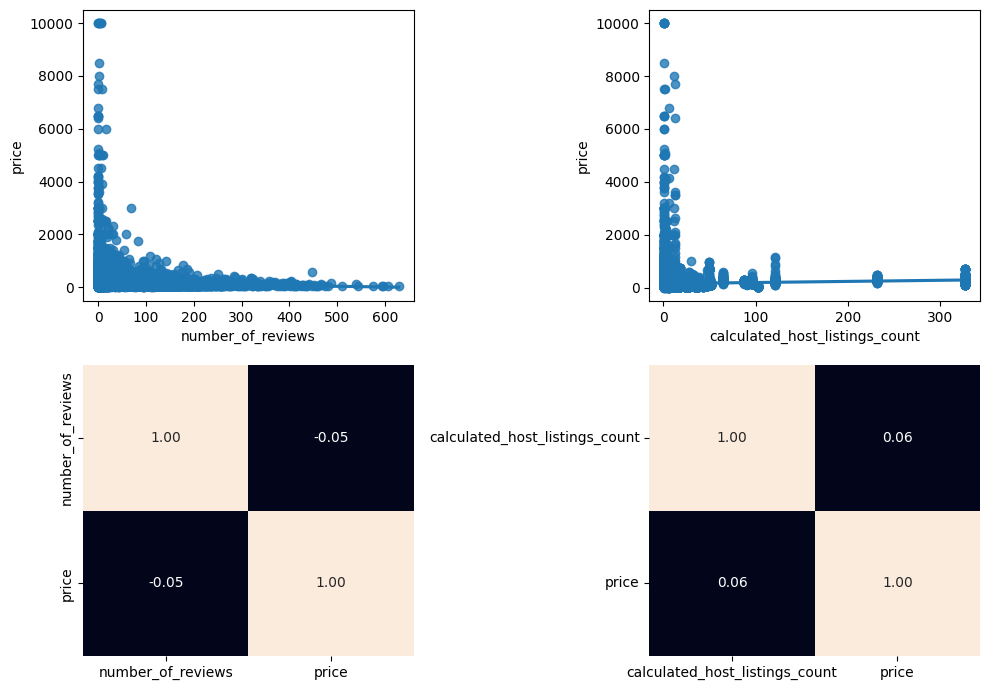

In [12]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = abnb_data, x = "number_of_reviews", y = "price")
sns.heatmap(abnb_data[["number_of_reviews", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = abnb_data, x = "calculated_host_listings_count", y = "price")
sns.heatmap(abnb_data[["calculated_host_listings_count", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

For the number_of_reviews variable we can that the most expensive listings tend to be among the less reviewed ones for some reason.

It also seems that most hosts have less than 100 listings each, and the hosts of the pricier listings have even less, although it's hard to tell with the current scale.

#### 4.2 Categorical-categorical
Let's have a look on categorical variables and see what we can find out.

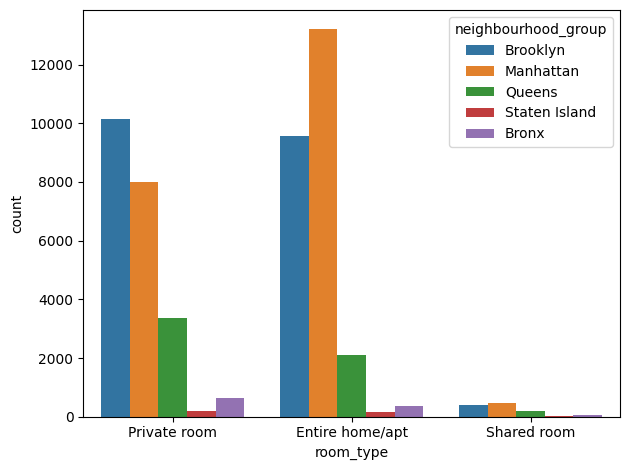

In [13]:
abnb_data_avg_price1 = abnb_data.groupby(['neighbourhood_group'])['room_type'].count().reset_index(name='avg_price')

sns.countplot(data = abnb_data, x = "room_type", hue = "neighbourhood_group")

plt.tight_layout()

plt.show()

Apparently, Brooklyn is the neighborhood with the most rooms listed, but Manhattan wins the contest for having the most listings of any given type when we take a look at the Entire home/apt section

#### 4.3 Categorical-numerical
Let's see how categorical variables relate with the predictive.

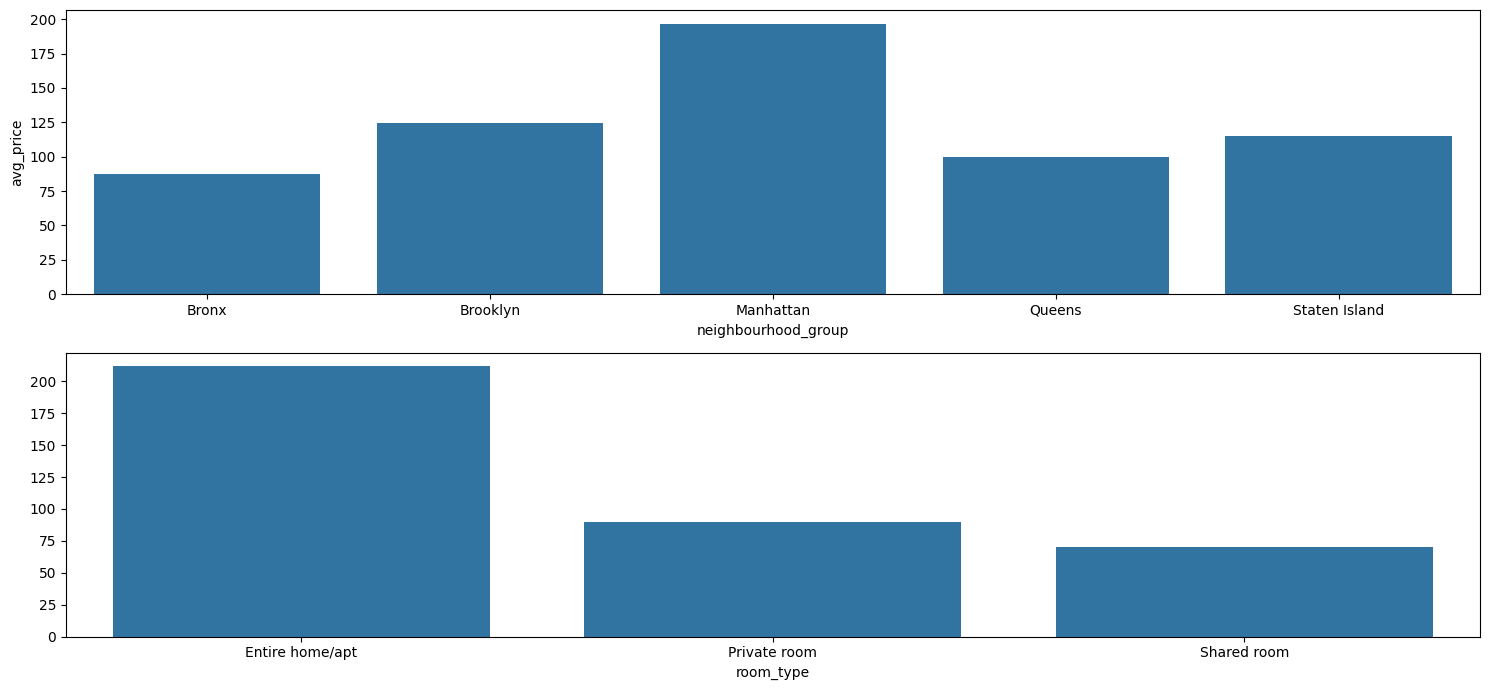

In [14]:
abnb_data_avg_price1 = abnb_data.groupby(['neighbourhood_group'])['price'].mean().reset_index(name='avg_price')
abnb_data_avg_price2 = abnb_data.groupby(['room_type'])['price'].mean().reset_index(name='avg_price')

fig, axis = plt.subplots(2, figsize = (15, 7))

sns.barplot(ax = axis[0], data = abnb_data_avg_price1, x = "neighbourhood_group", y = abnb_data_avg_price1["avg_price"])
sns.barplot(ax = axis[1], data = abnb_data_avg_price2, x = "room_type", y = abnb_data_avg_price2["avg_price"]).set(ylabel = None)

plt.tight_layout()

plt.show()

It seems the priciest neighborhood, on average, is Manhattan, while the rest seem to have a similar avg price.

When it comes to types of listings, the most expensive ones, as common sense would tell, are the entire homes/apt.

#### 4.4 Correlation analysis

Let's take a look at how each variable correlates wih each other whenever it makes sense. For example, those related to the location of a listing:

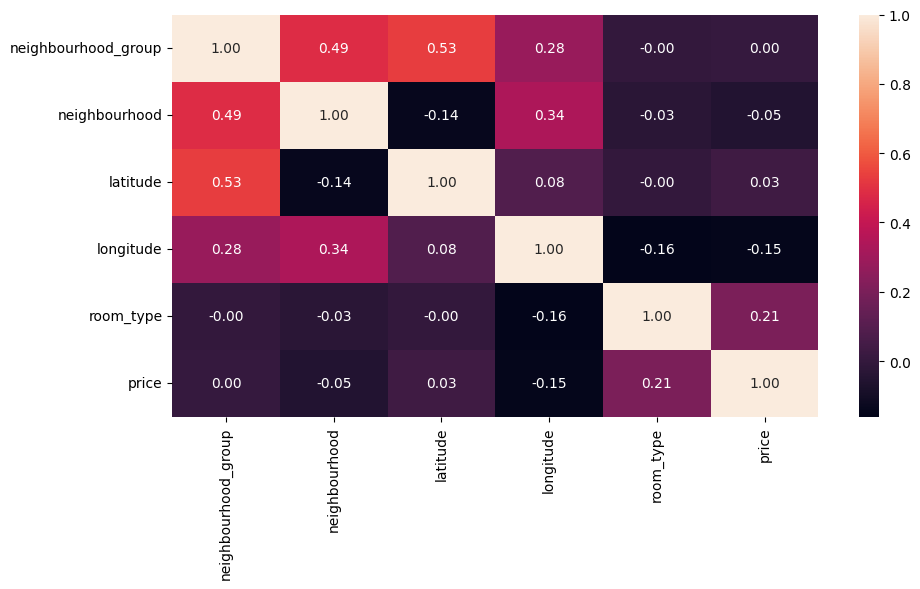

In [15]:
abnb_data_factorised = abnb_data
abnb_data_factorised["neighbourhood"] = pd.factorize(abnb_data["neighbourhood"])[0]
abnb_data_factorised["neighbourhood_group"] = pd.factorize(abnb_data["neighbourhood_group"])[0]
abnb_data_factorised["room_type"] = pd.factorize(abnb_data["room_type"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(abnb_data_factorised[[
    "neighbourhood_group", 
    "neighbourhood", 
    "latitude", 
    "longitude", 
    "room_type",
    "price"
    ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()


plt.show()

As expected, location variables are tightly related to each other, while not so much to the price and room type.

Now, let's do the same with the other variables:

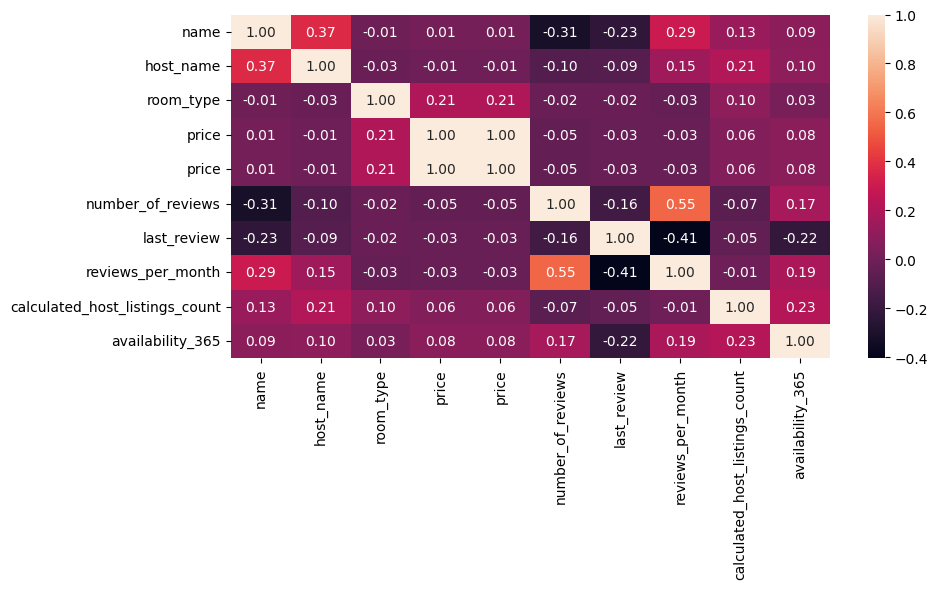

In [16]:
abnb_data_factorised["name"] = pd.factorize(abnb_data["name"])[0]
abnb_data_factorised["host_name"] = pd.factorize(abnb_data["host_name"])[0]
abnb_data_factorised["room_type"] = pd.factorize(abnb_data["room_type"])[0]
abnb_data_factorised["last_review"] = pd.factorize(abnb_data["last_review"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(abnb_data_factorised[[
    "name", 
    "host_name",  
    "room_type",
    "price",
    "price",
    "number_of_reviews",
    "last_review",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365"
    ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

Interestingly, the name of the listing seems related to the host itself and the amount of reviews that they get. Also, the number of reviews seems tightly related to the reviews per month, which makes sense. Regarding the price, the only thing that seems somewhat related to it is the room type.

### 5. Feature engineering
#### 5.1 Missing value analysis.

Let's analyse the null values and see if we can reduce them:

In [17]:
null_values = abnb_data_factorised[abnb_data.isna().any(axis=1)]
print(null_values.shape)
null_values.head()

(10052, 14)


,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,2,2,1,2,40.80902,-73.94190,0,150,3,0,-1,NaN,1,365
19,19,19,1,4,40.79685,-73.94872,1,190,7,0,-1,NaN,2,249
26,26,24,1,18,40.86754,-73.92639,0,80,4,0,-1,NaN,1,0
36,36,32,0,6,40.68876,-73.94312,0,35,60,0,-1,NaN,1,365
38,38,34,0,22,40.63702,-73.96327,0,150,1,0,-1,NaN,1,365


We seem to have >10k nulls, which is roughtly 20% of the dataset. Knowing this, it seems we wouldn't be able to remove the rows containing nulls without significantly affecting the data. We know from the previous step that most of the null values come from the columns related to reviews. Let's see what we're left with if we stop counting them.

In [18]:
data_without_reviews = abnb_data_factorised.drop(['last_review', 'reviews_per_month'], axis=1, inplace=False)
null_values = data_without_reviews[data_without_reviews.isna().any(axis=1)]
print(null_values.shape)
null_values.head()

(0, 12)


,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365


I've printed the head for readability, but after glancing the whole dataframe we can conclude that most of the nulls come from either the name or host_name columns. Since they are only 37, or 0.07% of the dataset, we can safely remove them.

In [19]:
abnb_data_factorised.drop(null_values.index, inplace=True)
abnb_data_factorised.shape

(48895, 14)

We still have >10k nulls from the review columns, which are too many to remove and too much missing information to consider the column in a ML model. These columns don't seem to add much value to a potential prediction of price, so I take the decision of removing them from the dataset.

In [20]:
abnb_data_factorised.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True)
abnb_data_factorised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  int64  
 1   host_name                       48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  int64  
 3   neighbourhood                   48895 non-null  int64  
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  int64  
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(10)
memory 

#### 5.2 Feature engineering
Rather thatn adding new features first, let's start by getting rid of those that don't seem to add any value as we saw in step 4. For instance, we can easily tell that the variables name and host_name don't add much to the ability to predict the price and that the coordinates combined with the neighborhood add information that's just too similar. 

In this case, I think it's safe to drop the name, host_name, latitude and longitude variables.

In [21]:
abnb_data_factorised.drop(['name', 'host_name', 'latitude', 'longitude'], axis=1, inplace=True)
abnb_data_factorised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   neighbourhood_group             48895 non-null  int64
 1   neighbourhood                   48895 non-null  int64
 2   room_type                       48895 non-null  int64
 3   price                           48895 non-null  int64
 4   minimum_nights                  48895 non-null  int64
 5   number_of_reviews               48895 non-null  int64
 6   calculated_host_listings_count  48895 non-null  int64
 7   availability_365                48895 non-null  int64
dtypes: int64(8)
memory usage: 3.0 MB


#### 5.3 Outlier analysis
Now that we have a tidier dataset, we can proceed to study the outliers.

In [22]:
abnb_data_factorised.head()
abnb_data_factorised.describe()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.786911,29.888782,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.844386,34.676634,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,7.500000,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,19.000000,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,4.000000,220.000000,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


From this summary we can deduct several things. For example, the minimum price is marked as zero, which doesn't really make sense and could ruin our predictions. Let's take a look at how many of these are there.

In [23]:
abnb_data_factorised[abnb_data_factorised['price'] == 0]['price'].count()

11

Since they're very few we can remove them and measure again.

In [24]:
abnb_data_factorised = abnb_data_factorised[abnb_data_factorised['price'] != 0]
abnb_data_factorised.describe()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,0.786986,29.889534,0.567118,152.755053,7.029887,23.271991,7.144628,112.779498
std,0.844288,34.673859,0.541183,240.170260,20.512224,44.551331,32.956185,131.627271
min,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,8.000000,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,19.000000,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,4.000000,220.000000,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


Now we hace a more reasonable minimum price. We can also appreciate that the standard deviation and max values are several times higher than the mean for the variables price, minimum _nights, number_of_reviews, calculated_host_listings_count and availability_365, meaning that most likely we're dealing with outliers un the set. The other variables are categorical so we won't count them.

Let's represent it in a graph:

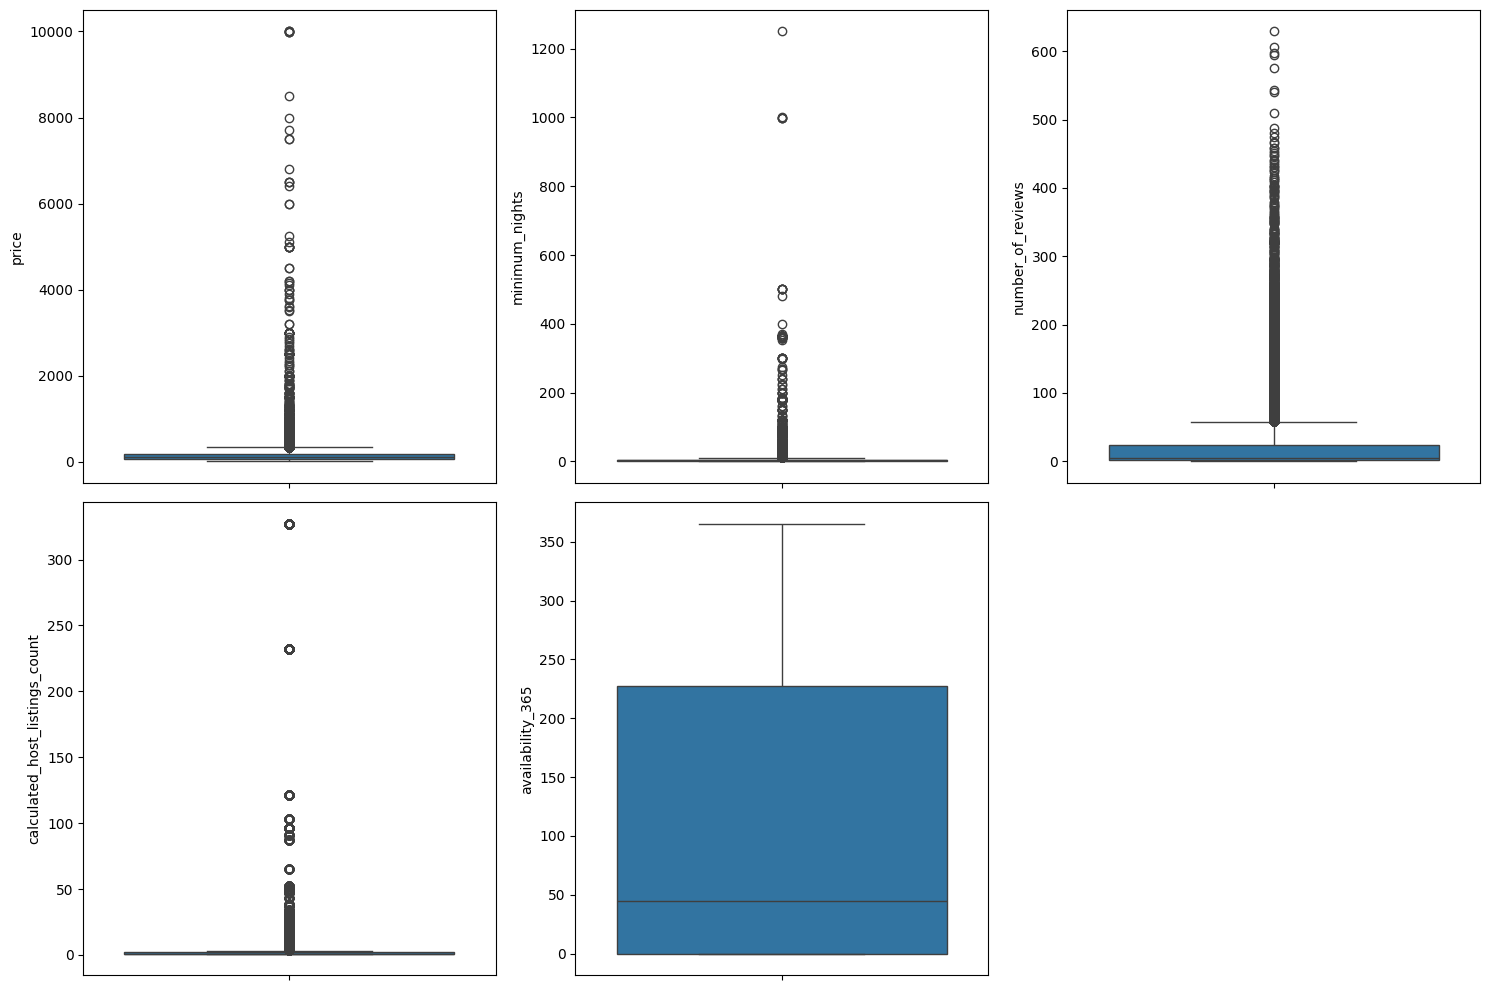

In [25]:
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = abnb_data_factorised, y = "price")
sns.boxplot(ax = axis[0, 1], data = abnb_data_factorised, y = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = abnb_data_factorised, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 0], data = abnb_data_factorised, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 1], data = abnb_data_factorised, y = "availability_365")
fig.delaxes(ax = axis[1,2])

plt.tight_layout()

plt.show()

As you can see in the plots, the whiskers are very short in all graphs except the availability one, there are clearly many outliers. Let's fix that:

In [26]:
# For price
price_stats = abnb_data_factorised["price"].describe()

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


Since we know the min price is 10, let's see how many values are above the upper limit.

In [27]:
print(abnb_data_factorised[abnb_data_factorised["price"] > 334].shape)
abnb_data_factorised[abnb_data_factorised["price"] > 334][abnb_data_factorised["price"] < 1000].shape

(2972, 8)


/tmp/ipykernel_431/2623808636.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  abnb_data_factorised[abnb_data_factorised["price"] > 334][abnb_data_factorised["price"] < 1000].shape


(2674, 8)

It seems there are around 3000 values higher than the upper bound from which only around 300 are above 1000, so let's remove the ones above 1000 to not remove too much data.

In [28]:
abnb_data_factorised = abnb_data_factorised[abnb_data_factorised["price"] < 1000]
abnb_data_factorised.describe()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48586.000000,48586.000000,48586.000000,48586.000000,48586.000000,48586.000000,48586.000000,48586.000000
mean,0.786543,29.887787,0.565430,140.269049,6.974931,23.372803,7.168670,112.365928
std,0.845588,34.691357,0.541506,112.899316,20.276877,44.651661,33.046098,131.383634
min,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,7.000000,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,19.000000,1.000000,105.000000,3.000000,5.000000,1.000000,44.000000
75%,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,2.000000,225.000000
max,4.000000,220.000000,2.000000,999.000000,1250.000000,629.000000,327.000000,365.000000


Let's do the same process for the other variables:

In [29]:
# For minimum_nights
minimum_nights_stats = abnb_data_factorised["minimum_nights"].describe()

minimum_nights_iqr = minimum_nights_stats["75%"] - minimum_nights_stats["25%"]
upper_limit = minimum_nights_stats["75%"] + 1.5 * minimum_nights_iqr
lower_limit = minimum_nights_stats["25%"] - 1.5 * minimum_nights_iqr

print(f"minimum_nights: The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(minimum_nights_iqr, 2)}")

# For number_of_reviews
number_of_reviews_stats = abnb_data_factorised["number_of_reviews"].describe()

number_of_reviews_iqr = number_of_reviews_stats["75%"] - number_of_reviews_stats["25%"]
upper_limit = number_of_reviews_stats["75%"] + 1.5 * number_of_reviews_iqr
lower_limit = number_of_reviews_stats["25%"] - 1.5 * number_of_reviews_iqr

print(f"number_of_reviews: The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(number_of_reviews_iqr, 2)}")

# For calculated_host_listings_count
calculated_host_listings_count_stats = abnb_data_factorised["calculated_host_listings_count"].describe()

calculated_host_listings_count_iqr = calculated_host_listings_count_stats["75%"] - calculated_host_listings_count_stats["25%"]
upper_limit = calculated_host_listings_count_stats["75%"] + 1.5 * calculated_host_listings_count_iqr
lower_limit = calculated_host_listings_count_stats["25%"] - 1.5 * calculated_host_listings_count_iqr

print(f"calculated_host_listings_count: The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(calculated_host_listings_count_iqr, 2)}")

minimum_nights: The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0
number_of_reviews: The upper and lower limits for finding outliers are 58.5 and -33.5, with an interquartile range of 23.0
calculated_host_listings_count: The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


In [30]:
print("minimum_nights > 30", abnb_data_factorised[abnb_data_factorised["minimum_nights"] > 30].shape)
print("number_of_reviews > 150", abnb_data_factorised[abnb_data_factorised["number_of_reviews"] > 150].shape)
print("calculated_host_listings_count > 100", abnb_data_factorised[abnb_data_factorised["calculated_host_listings_count"] > 100].shape)


minimum_nights > 30 (719, 8)
number_of_reviews > 150 (1345, 8)
calculated_host_listings_count > 100 (781, 8)


After some trial and error, we found some upper bounds that don't remove too many values from the set nor alter its composition significantly. Let's drop them:

In [31]:
abnb_data_factorised = abnb_data_factorised[abnb_data_factorised["minimum_nights"] < 30]
abnb_data_factorised = abnb_data_factorised[abnb_data_factorised["number_of_reviews"] < 150]
abnb_data_factorised = abnb_data_factorised[abnb_data_factorised["calculated_host_listings_count"] < 100]
abnb_data_factorised.describe()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,42464.000000,42464.000000,42464.000000,42464.000000,42464.000000,42464.000000,42464.000000,42464.000000
mean,0.780850,30.470634,0.545333,138.548559,3.484834,19.039115,2.185239,96.907757
std,0.865908,35.443856,0.544744,113.298540,4.076559,29.658541,5.617709,124.947603
min,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,8.000000,0.000000,68.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,19.000000,1.000000,100.000000,2.000000,6.000000,1.000000,24.000000
75%,1.000000,37.000000,1.000000,174.000000,4.000000,23.000000,2.000000,179.000000
max,4.000000,220.000000,2.000000,999.000000,29.000000,149.000000,96.000000,365.000000


Now we can see that, while the mean and max values are still relatively higher than the mean, they're within a more reasonable order of magnitude now.

#### 5.4 Inference of new features

Let's look again at our dataset to see if we can infer any new features.

In [32]:
print(abnb_data_factorised.info())
abnb_data_factorised.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42464 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   neighbourhood_group             42464 non-null  int64
 1   neighbourhood                   42464 non-null  int64
 2   room_type                       42464 non-null  int64
 3   price                           42464 non-null  int64
 4   minimum_nights                  42464 non-null  int64
 5   number_of_reviews               42464 non-null  int64
 6   calculated_host_listings_count  42464 non-null  int64
 7   availability_365                42464 non-null  int64
dtypes: int64(8)
memory usage: 2.9 MB
None


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0,0,0,149,1,9,6,365
1,1,1,1,225,1,45,2,355
2,1,2,0,150,3,0,1,365
4,1,4,1,80,10,9,1,0
5,1,5,1,200,3,74,1,129


There doesn't seem to be any extractable features from the remaining columns.

#### 5.5 Feature scaling
Let's scale our features now

In [36]:
from sklearn.preprocessing import MinMaxScaler

num_variables = list(abnb_data_factorised.columns)
num_variables.remove('price')

scaler = MinMaxScaler()
norm_features = scaler.fit_transform(abnb_data_factorised[num_variables])
total_data_norm = pd.DataFrame(norm_features, index = abnb_data_factorised.index, columns = num_variables)
total_data_norm["price"] = abnb_data_factorised["price"]
total_data_norm.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
0,0.00,0.000000,0.0,0.000000,0.060403,0.052632,1.000000,149
1,0.25,0.004545,0.5,0.000000,0.302013,0.010526,0.972603,225
2,0.25,0.009091,0.0,0.071429,0.000000,0.000000,1.000000,150
4,0.25,0.018182,0.5,0.321429,0.060403,0.000000,0.000000,80
5,0.25,0.022727,0.5,0.071429,0.496644,0.000000,0.353425,200


### 6. Feature Selection
Now that we've scaled the dataset, we can select the most relevant features.

In [37]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = total_data_norm.drop("price", axis = 1)
y = total_data_norm["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,0.0,0.035714,0.000000,0.000000
1,0.5,0.000000,0.000000,0.926027
2,0.0,0.035714,0.000000,0.575342
3,0.0,0.035714,0.000000,0.235616
4,0.0,0.071429,0.042105,1.000000
